## 1. Import Libraries

This cell imports all the necessary libraries for the project. Each library has a specific role:
- **pandas & numpy**: For data manipulation and numerical operations.
- **matplotlib & seaborn**: For data visualization.
- **scikit-learn**: A comprehensive library for machine learning tasks, including data preprocessing, model training, and evaluation.

In [1]:
# Import pandas for data manipulation and analysis (e.g., reading CSV files)
import pandas as pd

# Import numpy for numerical operations, especially for array manipulation
import numpy as np

# Import matplotlib and seaborn for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split to divide the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Import StandardScaler to standardize features and LabelEncoder to convert categorical labels to numbers
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Import the Support Vector Classifier (SVC) model
from sklearn.svm import SVC

# Import metrics to evaluate the model's performance
from sklearn.metrics import classification_report, confusion_matrix

# Import PCA for dimensionality reduction (though not used in this notebook, it's good practice to have it ready)
from sklearn.decomposition import PCA

## 2. Load the Data

Here, we load the dataset from a CSV file into a pandas DataFrame and display the first few rows to understand its structure.

In [2]:
# Load the dataset from the 'apples_and_oranges.csv' file into a pandas DataFrame
df = pd.read_csv("apples_and_oranges.csv")

# Print a header for the output
print("Initial Data:")

# Display the first 5 rows of the DataFrame to get a quick overview of the data
print(df.head())

Initial Data:
   Weight  Size   Class
0      69  4.39  orange
1      69  4.21  orange
2      65  4.09  orange
3      72  5.85   apple
4      67  4.70  orange


## 3. Data Cleaning

Data cleaning is a crucial step to ensure the quality of the data. Here, we remove any duplicate entries and rows with missing values.

In [3]:
# Remove any duplicate rows from the DataFrame to prevent data redundancy.
# 'inplace=True' modifies the DataFrame directly without needing to reassign it.
df.drop_duplicates(inplace=True)

In [4]:
# Remove rows that contain any missing values (NaN).
# This is a simple approach. Alternatively, one could use df.fillna() to impute missing values.
df.dropna(inplace=True)

## 4. Data Preprocessing

Preprocessing prepares the data for the machine learning model. This involves:
1.  **Label Encoding**: Converting the categorical target variable (`Class`) into numerical values.
2.  **Feature-Label Split**: Separating the data into features (`X`) and the target label (`y`).
3.  **Feature Scaling**: Standardizing the features to have a mean of 0 and a standard deviation of 1. This is important for SVMs, as they are sensitive to the scale of input features.

In [5]:
# Convert categorical text columns to numerical format.
# Initialize the LabelEncoder
le = LabelEncoder()

# Loop through all columns of type 'object' (typically strings)
for col in df.select_dtypes(include='object').columns:
    # Fit the encoder to the column and transform the string values to integers (e.g., 'apple' -> 0, 'orange' -> 1)
    df[col] = le.fit_transform(df[col])

In [6]:
# Separate the data into features (X) and the target label (y).
# X contains all columns except 'Class'. 'axis=1' specifies that we are dropping a column.
X = df.drop('Class', axis=1)

# y contains only the 'Class' column, which is our target for prediction.
y = df['Class']

In [7]:
# Standardize the features to have zero mean and unit variance.
# This is crucial for distance-based algorithms like SVM.
scaler = StandardScaler()

# Fit the scaler to the feature data and transform it.
X_scaled = scaler.fit_transform(X)

## 5. Data Visualization

We visualize the distribution of the classes in our target variable. This helps to check for class imbalance, which can affect model performance.

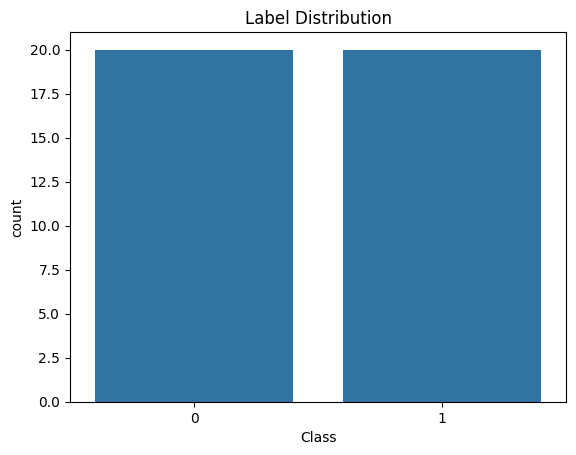

In [8]:
# Use seaborn's countplot to create a bar chart showing the number of samples for each class.
sns.countplot(x=y)

# Set the title of the plot for clarity.
plt.title("Label Distribution")

# Display the plot.
plt.show()

## 6. Train-Test Split

The dataset is split into two parts: a training set for teaching the model and a testing set for evaluating its performance on unseen data. Using `stratify=y` ensures that the class distribution is the same in both sets.

In [9]:
# Split the scaled features (X_scaled) and labels (y) into training and testing subsets.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2,      # Assign 20% of the data to the test set.
    random_state=42,    # Use a fixed random seed for reproducibility.
    stratify=y          # Ensure the proportion of classes is the same in both train and test sets.
)

## 7. Model Training

We initialize and train a Support Vector Classifier (SVC). We use a `linear` kernel because the problem appears to be linearly separable. The `C` parameter controls the trade-off between achieving a smooth decision boundary and classifying training points correctly.

In [10]:
# Initialize the Support Vector Classifier model.
# kernel='linear': Specifies that the model should find a linear (straight-line) decision boundary.
# C=1: The regularization parameter. It balances margin maximization and misclassification penalty.
svm = SVC(kernel='linear', C=1)

# Train the SVM model using the training data (X_train, y_train).
svm.fit(X_train, y_train)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## 8. Model Evaluation

After training, we evaluate the model's performance on the test data. The **confusion matrix** shows the number of correct and incorrect predictions, while the **classification report** provides key metrics like precision, recall, and F1-score.

In [11]:
# Use the trained model to make predictions on the test feature set.
y_pred = svm.predict(X_test)

# Print the confusion matrix to see the number of true positives, true negatives, false positives, and false negatives.
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report for a detailed breakdown of performance metrics.
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[4 0]
 [0 4]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



## 9. Visualization of Decision Boundary

To better understand how the SVM is making decisions, we plot its decision boundary. This visualization is only possible for datasets with two features. The plot shows the line that the SVM has learned to separate the two classes and colors the regions corresponding to each predicted class.

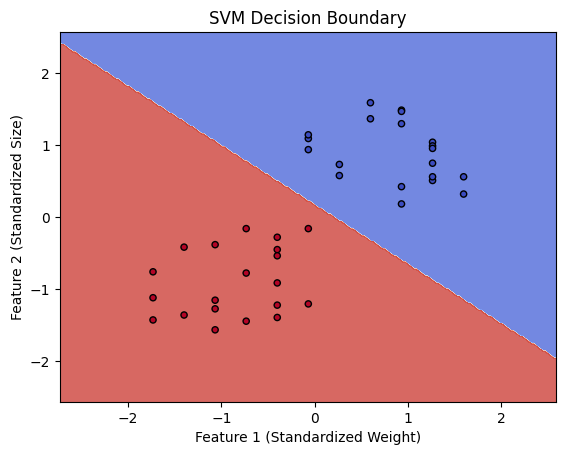

In [12]:
# This visualization only works for 2D feature spaces. Check if the number of features is 2.
if X_scaled.shape[1] == 2:
    # Create a mesh grid of points to evaluate the model across the feature space.
    h = 0.02  # Step size in the mesh
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the class for each point in the mesh grid.
    # np.c_ concatenates the flattened xx and yy arrays to create a list of points.
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    # Reshape the predictions to match the mesh grid's shape.
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary by filling regions with colors corresponding to the predicted class.
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    # Plot the actual data points on top of the decision regions.
    # 'c=y' colors the points based on their true labels.
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    
    # Set plot titles and labels for clarity.
    plt.title("SVM Decision Boundary")
    plt.xlabel("Feature 1 (Standardized Weight)")
    plt.ylabel("Feature 2 (Standardized Size)")
    
    # Display the final plot.
    plt.show()